In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron

In [75]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [76]:
# OR: Linear
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['output']=[1,1,1,0]

In [77]:
# AND: Linear 
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['output']=[1,0,0,0]

In [78]:
# XOR: Non-Linear
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['output']=[0,1,1,0]

In [79]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


In [80]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


In [81]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


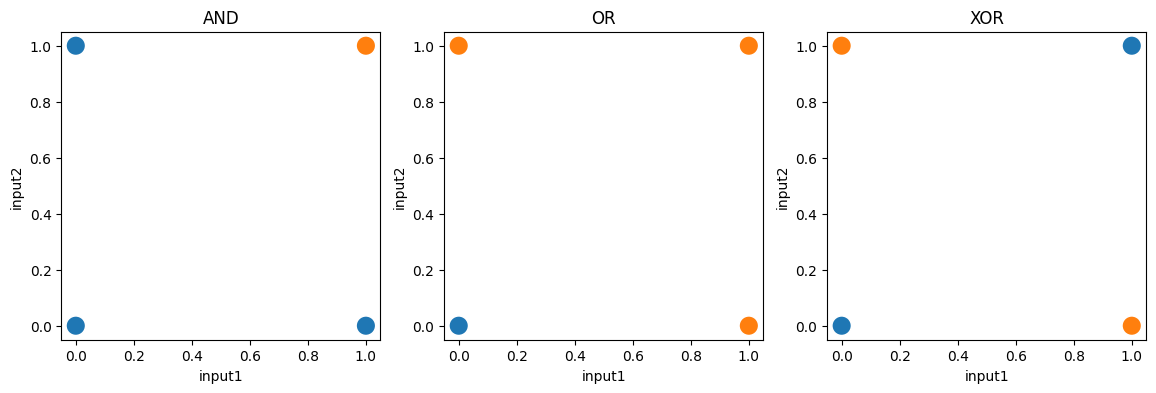

In [82]:
# Ploting AND, OR and XOR

# List of datasets and titles
datasets = [and_data, or_data, xor_data]
titles = ["AND", "OR", "XOR"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Loop through datasets and axes
for data, ax, title in zip(datasets, axes, titles):
    sns.scatterplot(
        data=data,
        x='input1',
        y='input2',
        hue='output',
        s=200,
        legend=False,
        ax=ax
    )
    ax.set_title(title)

plt.show()


In [83]:
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [84]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [85]:
# Function to plot data points and perceptron decision boundary
def plot_perceptron_boundary(clf, data, ax, title):

    X = data.iloc[:,0:2].values
    y = data.iloc[:,-1].values
    
    # Scatter plot of points
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, s=200, ax=ax, legend=False)
    
    # Plot the decision boundary
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    xx = np.linspace(x_min, x_max, 100)
    
    if clf.coef_[0][1] != 0:  # avoid division by zero
        yy = -(clf.coef_[0][0] * xx + clf.intercept_[0]) / clf.coef_[0][1]
        ax.plot(xx, yy, 'k--', label="Decision Boundary")
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
    ax.set_title(title)

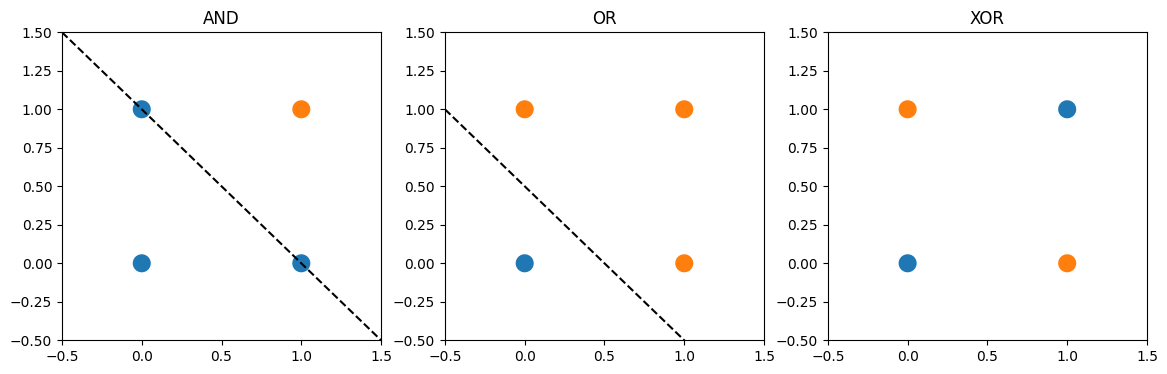

In [86]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot AND, OR, XOR
plot_perceptron_boundary(clf1, and_data, axes[0], "AND")
plot_perceptron_boundary(clf2, or_data, axes[1], "OR")
plot_perceptron_boundary(clf3, xor_data, axes[2], "XOR")

plt.show()

- Linearly separable datasets → single-layer perceptron works (AND, OR).

- Non-linearly separable datasets → single-layer perceptron fails (XOR).

This is a classic demonstration of the limitation of a single-layer perceptron and the need for non-linear models or multi-layer networks for more complex logic like XOR.